In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [ ]:
!pip install indic_nlp_library

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize

In [3]:
df1 = pd.read_csv('kisan_andolan_NDTV_nov2020.csv')
df2 = pd.read_csv('kisan_andolan_quint.csv')

In [5]:
print('DF 1: ', df1.shape)
print('DF 2:', df2.shape)

DF 1:  (237, 5)
DF 2: (240, 5)


In [27]:
df = pd.concat([df1, df2], ignore_index=True)

In [28]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [30]:
df.tail()

,news_title,news_details,news_date,source_name
472,"योगेंद्र, मेधा, अग्निवेश समेत 40 लोगों को मंदसौर जाने से रोका गया","मध्य प्रदेश में मारे गए किसानों के परिवारवालों से मिलने जा रहे सामाजिक कार्यकर्ता स्वामी अग्निवेश, मेधा पाटकर, योगेंद्र यादव समेत 40 लोगों को पुलिस ने रविवार को गिरफ्तार कर लिया. हालांकि, पुलिस ने बाद में उन्हें जमानत पर रिहा कर दिया.","11 Jun 2017, 11:03 PM IST",The Quint
473,"शिवराज उपवास पर, किसान भी उसी टेंट के नीचे धरने पर बैठे",मध्यप्रदेश में शांति बहाली और किसानों से उनकी मांगों पर चर्चा के लिए शनिवार से मुख्यमंत्री शिवराज सिंह चौहान उपवास पर बैठे हैं. दशहरा मैदान पर मुख्यमंत्री से किसानों के प्रतिनिधियों ने मुलाकात भी की. लेकिन जब उनकी कर्ज माफी की मांग नहीं मांगी गई तो किसान भी शिवराज सिंह के सामने उसी टेंट के नीचे बैठ गए.,"10 Jun 2017, 9:34 PM IST",The Quint
474,"शिवराज शांति बहाली के लिए रखेंगे उपवास, कहा- बातचीत के रास्ते खुले","मध्य प्रदेश में चल रहे किसान आंदोलन के हिंसक होने के बाद सीएम शिवराज सिंह चौहान ने आज सफाई दी है. सीएम शिवराज ने कहा है कि कानून व्यवस्था बनाए रखना सरकारी की प्राथमिकता है, अराजक तत्वों से सख्ती से निपटा जाएगा.","09 Jun 2017, 6:43 PM IST",The Quint
475,"किसान आंदोलन पर सियासत जारी,राहुल ने की पीड़ित परिवारों से मुलाकात","मध्यप्रदेश के मंदसौर में पुलिस फायरिंग में 5 किसानों की मौत के बाद सियासत भी गर्म है. गुरुवार को मंदसौर में पीड़ित परिवारों से मिलने जा रहे कांग्रेस उपाध्यक्ष राहुल गांधी समेत 29 नेताओं को गिरफ्तार कर लिया गया. हालांकि, इसके बाद उन्‍हें जमानत मिल गई. पुलिस ने उन्‍हें इस शर्त पर पीड़ि‍त परिवारों से मिलने की इजाज़त दी कि वो राजस्‍थान की सीमा में उनसे मिलेंगे.\nइसके बाद राहुल गांधी राजस्‍थान की सीमा में पीड़ि‍त परिवारों से मिले. उन्होंने कहा कि","08 Jun 2017, 10:38 PM IST",The Quint
476,देशभर में बंपर पैदावार के बाद भी किसान इन वजहों से हैं परेशान,"2016 में भरपूर मात्रा में पैदावार हुई, लेकिन आयात के कारण कुछ फसलों के दामों में 63% तक की कमी आ गई.\nनोटबंदी के कारण किसानों को कैश की कमी से जूझना पड़ा.\nअब तक 3.51 लाख करोड़ खर्च करने के बाद भी देश के आधे से ज्यादा किसान खेती के लिए बारिश पर निर्भर रहते हैं.","08 Jun 2017, 7:21 PM IST",The Quint


In [31]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [32]:
count_length()

In [33]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,"MSP को अधिक प्रभावी बनाने के लिए बनी समिति, संयुक्त किसान मोर्चा के सदस्य शामिल होंगे या नहीं, फैसला आज","जून, 2020 में लाये गये तीन विवादास्पद कृषि कानूनों के खिलाफ चले किसान आंदोलन को समाप्त करने के लिए सरकार और संयुक्त किसान मोर्चा (एसकेएम) के बीच सहमति के बिंदुओं में शामिल न्यूनतम समर्थन मूल्य (एमएसपी) पर समिति गठित करने का वादा किया था.","मंगलवार जुलाई 19, 2022 11:50 AM IST",NDTV News,20
1,"संयुक्त किसान मोर्चा करेगा ""वादाखिलाफी विरोधी सभा"" का आयोजन, केंद्र पर लगाया वादे से पीछे हटने का आरोप","सरकार की वादाखिलाफी के विरोध में, 18 जुलाई को संसद के मानसून सत्र की शुरुआत से 31 जुलाई शहीद उधम सिंह की शहादत दिवस तक, देशभर में जिला स्तर पर “वादाखिलाफी विरोधी सभा” आयोजित की जाएगी.","सोमवार जुलाई 4, 2022 07:13 AM IST",NDTV News,18
2,"'किसानों को स्टेडियमों में कैद करना चाहती थी केंद्र सरकार, लेकिन...': पंजाब में बोले अरविंद केजरीवाल","केजरीवाल ने कहा, "" दिल्ली सरकार ने आंदोलनरत किसानों की मदद की. उनको पीने का साफ पानी दिया, शौचालय की सुविधा दी, लंगर में खाना खिलाया. हमें खुशी है कि हमने किसान भाइयों की मदद की.""","रविवार मई 22, 2022 07:05 PM IST",NDTV News,16
3,किसान आंदोलन में प्रधानमंत्री मोदी पर हमलावर रहे गवर्नर सत्यपाल मलिक ने क्यों की प्रधानमंत्री मोदी की तारीफ़,किसानों के आंदोलन (Kisan Andolan) पर केंद्र सरकार के खिलाफ हमलावर तेवर अपनाते रहे मेघालय के राज्यपाल सत्यपाल मलिक (Satyapal Malik) ने पीएम नरेंद्र मोदी (Narendra Modi) की तारीफ़ की है.,"शुक्रवार अप्रैल 22, 2022 05:53 PM IST",NDTV News,18
4,"संयुक्त किसान मोर्चा ने फिर की आंदोलन की घोषणा, सरकार पर लगाया वादे पूरा नहीं करने का आरोप",बैठक में लखीमपुर खीरी मामले में चल रही कानूनी प्रक्रिया की समीक्षा कर चिंता जताई गई कि पुलिस प्रशासन और अभियुक्त मिलकर अपराधियों को बचाने और बेकसूर किसानों को फंसाने की कोशिश कर रहे हैं.,"सोमवार मार्च 14, 2022 07:18 PM IST",NDTV News,18


In [34]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [35]:
df.tail()

,news_title,news_details,news_date,source_name,word_count
472,"[योगेंद्र, ,, मेधा, ,, अग्निवेश, समेत, 40, लोगों, को, मंदसौर, जाने, से, रोका, गया]","मध्य प्रदेश में मारे गए किसानों के परिवारवालों से मिलने जा रहे सामाजिक कार्यकर्ता स्वामी अग्निवेश, मेधा पाटकर, योगेंद्र यादव समेत 40 लोगों को पुलिस ने रविवार को गिरफ्तार कर लिया. हालांकि, पुलिस ने बाद में उन्हें जमानत पर रिहा कर दिया.","11 Jun 2017, 11:03 PM IST",The Quint,12
473,"[शिवराज, उपवास, पर, ,, किसान, भी, उसी, टेंट, के, नीचे, धरने, पर, बैठे]",मध्यप्रदेश में शांति बहाली और किसानों से उनकी मांगों पर चर्चा के लिए शनिवार से मुख्यमंत्री शिवराज सिंह चौहान उपवास पर बैठे हैं. दशहरा मैदान पर मुख्यमंत्री से किसानों के प्रतिनिधियों ने मुलाकात भी की. लेकिन जब उनकी कर्ज माफी की मांग नहीं मांगी गई तो किसान भी शिवराज सिंह के सामने उसी टेंट के नीचे बैठ गए.,"10 Jun 2017, 9:34 PM IST",The Quint,12
474,"[शिवराज, शांति, बहाली, के, लिए, रखेंगे, उपवास, ,, कहा, -, बातचीत, के, रास्ते, खुले]","मध्य प्रदेश में चल रहे किसान आंदोलन के हिंसक होने के बाद सीएम शिवराज सिंह चौहान ने आज सफाई दी है. सीएम शिवराज ने कहा है कि कानून व्यवस्था बनाए रखना सरकारी की प्राथमिकता है, अराजक तत्वों से सख्ती से निपटा जाएगा.","09 Jun 2017, 6:43 PM IST",The Quint,12
475,"[किसान, आंदोलन, पर, सियासत, जारी, ,, राहुल, ने, की, पीड़ित, परिवारों, से, मुलाकात]","मध्यप्रदेश के मंदसौर में पुलिस फायरिंग में 5 किसानों की मौत के बाद सियासत भी गर्म है. गुरुवार को मंदसौर में पीड़ित परिवारों से मिलने जा रहे कांग्रेस उपाध्यक्ष राहुल गांधी समेत 29 नेताओं को गिरफ्तार कर लिया गया. हालांकि, इसके बाद उन्‍हें जमानत मिल गई. पुलिस ने उन्‍हें इस शर्त पर पीड़ि‍त परिवारों से मिलने की इजाज़त दी कि वो राजस्‍थान की सीमा में उनसे मिलेंगे.\nइसके बाद राहुल गांधी राजस्‍थान की सीमा में पीड़ि‍त परिवारों से मिले. उन्होंने कहा कि","08 Jun 2017, 10:38 PM IST",The Quint,11
476,"[देशभर, में, बंपर, पैदावार, के, बाद, भी, किसान, इन, वजहों, से, हैं, परेशान]","2016 में भरपूर मात्रा में पैदावार हुई, लेकिन आयात के कारण कुछ फसलों के दामों में 63% तक की कमी आ गई.\nनोटबंदी के कारण किसानों को कैश की कमी से जूझना पड़ा.\nअब तक 3.51 लाख करोड़ खर्च करने के बाद भी देश के आधे से ज्यादा किसान खेती के लिए बारिश पर निर्भर रहते हैं.","08 Jun 2017, 7:21 PM IST",The Quint,13


In [36]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [37]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,news_title,news_details,news_date,source_name,word_count
467,"[महाराष्ट्र, BJP, सहयोगी, पार्टी, छोड़ा, NDA, CM, त्यागपत्र]","महाराष्ट्र में एनडीए को झटका लगा है. यहां की किसानों से संबंधित पार्टी स्वाभिमानी शेतकारी संगठन एनडीए से बाहर हो गया है. एसएसएस ने आरोप लगाया कि केंद्र सरकार ने किसानों के पक्ष में काम नहीं किया, इसके चलते वे सरकार से अलग हो रहे हैं. कुछ दिन पहले ही पार्टी ने एनडीए से अलग होने की बात कही थी. अब शेतकारी संगठन औपचारिक तौर पर अलग हो चुका है.\nएसएसएस के पास केवल एक सांसद और एक एमएलसी है. लेकिन एमएलसी सदाभाऊ खोत को पार्टी से बाहर किया जा चुका है. वे महाराष्ट्र सरकार में कृषि राज्य मंत्री भी हैं. वहीं पार्टी के अकेले सांसद राजू शेट्टी हैं जो हतकानांगल पार्लियामेंट सीट से चुनकर आते हैं.","05 Sep 2017, 5:34 AM IST",The Quint,8
468,"[MP, निकाय, चुनाव, BJP, 26, सीटों, जीत, मंदसौर, करारी, हार]","मध्य प्रदेश में 43 नगर निकाय और पंचायत प्रतिनिधियों के चुनाव में बीजेपी को 26 जगहों पर और कांग्रेस को 14 जगहों पर जीत हासिल हुई है. वहीं 3 स्‍थानों पर इंडिपेंडेंट कैंडिडेट को जीत मिली है.\nभले ही बीजेपी ने सबसे ज्यादा सीटें जीती हों, लेकिन मंदसौर जिले के नतीजों ने उनकी जीत का मजा कम जरूर कर दिया है. मंदसौर में हुए किसान आंदोलन का असर इन नतीजों पर भी देखने को मिला है. यहां 3 वार्डों में बीजेपी को हार का सामना करना पड़ा. इन तीनों जगहों पर कांग्रेस ने जीत दर्ज की है.","16 Aug 2017, 6:10 PM IST",The Quint,10
469,"[MP, मंदसौर, कांग्रेस, सांसद, ज्योतिरादित्य, सिंधिया, गिरफ्तार]",मध्य प्रदेश के मंदसौर में पुलिस की फायरिंग में मारे गए किसानों के परिजनों से मिलने जा रहे कांग्रेस सांसद ज्योतिरादित्य सिंधिया को गिरफ्तार कर लिया गया है.,"13 Jun 2017, 3:52 PM IST",The Quint,7
470,"[Qएक्सप्रेस, नीतीश, BJP, चेतावनी, ‘ट्यूबलाइट’, तोड़ेगी, रिकॉर्ड]","BJP में दम है तो UP-बिहार में दोबारा करा लें चुनाव: नीतीश\nबिहार के मुख्यमंत्री नीतीश कुमार ने लंबे वक्त के बाद देश के अलग-अलग राज्यों में चल रहे किसान आंदोलनों को लेकर मोदी सरकार पर निशाना साधा है. नीतीश ने कहा, ‘मैं बिहार में कल ही चुनाव कराने को तैयार हूं लेकिन यूपी में भी चुनाव कराइए. यूपी और बिहार के बीजेपी-एनडीए के सांसद-विधायक इस्तीफा दें. अगर हिम्मत है तो ऐसा करें, बिहार में कल ही चुनाव करा दूंगा.’\nपढ़ें पूरी खबर\nGST कंफ्यूजन: एक देश एक टैक्स या एक देश अनेक टैक्स?\nजीएसटी के मौजूदा ढांचे को देखकर कुछ ऐसा लग रहा है कि वादा किया गया एक देश एक टैक्स का और मिल गया 6 टैक्स और 9 सरचार्ज यानी 15 रेट. बड़े जोर-शोर से वादा किया गया कि पूरे देश में एक जैसा टैक्स लगेगा. लेकिन हकीकत देखिए टैक्स दरें 6 हो गई हैं. जीरो परसेंट जीएसटी वाले आइटम हटा लें तो भी रफ डायमंड के लिए आधा परसेंट, फिर सोने के लिए तीन परसेंट, फिर पांच परसेंट, 12 परसेंट, 18 परसेंट और 28 परसेंट.\nपढ़ें पूरी खबर\nराबड़ी को बेटों के लिए नहीं चाहिए मॉल जाने वाली बहू\nबिहार की पूर्व मुख्यमंत्री राबड़ी देवी अपने दोनों बेटों के लिए संस्कारी बहू की तलाश कर रही हैं. वैसे राबड़ी देवी को अपने बेटों के लिए ऐसी बहू चाहिए जो मॉल नहीं जाती हो. राबड़ी देवी का कहना है कि उनका बड़ा बेटा तेज प्रताप यादव काफी धार्मिक है, इसलिए उन्हें उसके लिए खासतौर पर ऐसी बहू चाहिए, जो सिनेमा हॉल और मॉल ना जाती हो.","12 Jun 2017, 10:58 PM IST",The Quint,7
471,"[नीतीश, चुनौती, BJP, दम, UP, बिहार, दोबारा, करा, चुनाव]","बिहार के मुख्यमंत्री नीतीश कुमार ने लंबे वक्त के बाद देश के अलग-अलग राज्यों में चल रहे किसान आंदोलनों को लेकर मोदी सरकार पर निशाना साधा है. सोमवार को प्रेस कॉन्फ्रेंस कर नीतीश कुमार ने किसानों के लिए राष्ट्रीय नीति नहीं बनाने को लेकर मोदी सरकार की जमकर खिंचाई की. इतना ही नहीं नीतीश ने बीजेपी को यूपी-बिहार में चुनाव कराने की चुनौती दी है.\nराजधानी पटना में प्रेस कॉन्फ्रेंस के दौरान नीतीश ने कहा कि 2014 के लोकसभा चुनाव से पहले बीजेपी ने किसानों से तमाम वादे किए थे. लेकिन अब वह वादों को पूरा नहीं कर रहे हैं. नीतीश ने कहा कि बीजेपी नेता कह रहे हैं कि बिहार में चुनाव हो जाए तो सरकार बदल जाएगी. इस पर उन्होंने कहा, ‘मैं बिहार में कल ही चुनाव कराने को तैयार हूं लेकिन यूपी में भी चुनाव कराइए. यूपी और बिहार के बीजेपी-एनडीए के सांसद-विधायक इस्तीफा दें. अगर हिम्मत है तो ऐसा करें, बिहार में कल ही चुनाव करा दूंगा.’","12 Jun 2017, 1:45 PM IST",The Quint,9
472,"[योगेंद्र, मेधा, अग्निवेश, समेत, 40, लोगों, मंदसौर, जाने, रोका]","मध्य प्रदेश में मारे गए किसानों के परिवार

In [38]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['news_title'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'किसान': 207, 'किसानों': 147, 'आंदोलन': 125, 'कृषि': 60, 'बोले': 57, 'सरकार': 55, 'दिल्ली': 41, 'बॉर्डर': 36, 'BJP': 35, 'कानून': 33, 'टिकैत': 30, 'क्या': 27, 'प्रदर्शन': 27, 'पुलिस': 26, 'यूपी': 25, 'आए': 25, 'पंजाब': 24, 'कानूनों': 23, 'समर्थन': 23, 'बैठक': 22, 'वापसी': 22, 'राकेश': 21, 'लेकर': 21, 'मोदी': 20, 'हरियाणा': 20, 'महापंचायत': 19, '10': 19, 'होगी': 18, 'मोर्चा': 17, 'विरोध': 17, 'ट्रैक्टर': 17, 'कांग्रेस': 17, 'वापस': 16, 'मंत्री': 16, 'बोलीं': 16, 'बीच': 16, 'बातचीत': 15, 'सिंघु': 15, 'रणनीति': 15, 'गई': 15, 'नेता': 15, 'Andolan': 15, 'जाम': 15, 'चुनाव': 14, 'बड़ी': 14, 'सिंह': 14, 'बातें': 14, 'Kisan': 14, 'PM': 14, 'केंद्र': 13, 'जारी': 13, 'रैली': 13, 'ट्वीट': 13, 'अब': 13, 'भारत': 13, 'देशभर': 13, 'खिलाफ': 13, 'हिंसा': 13, 'बीजेपी': 12, 'पहुंचे': 12, 'गांधी': 12, 'लाठीचार्ज': 12, 'राहुल': 12, 'लोगों': 12, 'फैसला': 11, 'करेंगे': 11, 'चर्चा': 11, 'लखनऊ': 11, 'यादव': 11, 'बंद': 11, 'इंटरनेट': 11, 'UP': 11, 'चक्का': 11, 'फोटो': 11, 'संयुक्त': 10, 'मलिक': 10, 'दी'

In [45]:
to_remove = ['बोले', 'क्या', 'आए', 'गई', 'अब', 'दी', 'होगा', 'गए', 'किसानों']
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (least_common)]
print(least_common)

['परेशान', 'वजहों', 'पैदावार', 'बंपर', 'परिवारों', 'पीड़ित', 'सियासत', 'खुले', 'रास्ते', 'रखेंगे', 'बहाली', 'शांति', 'टेंट', 'रोका', 'अग्निवेश', 'मेधा', 'करा', 'दोबारा', 'बिहार', 'दम', 'तोड़ेगी', '‘ट्यूबलाइट’', 'Qएक्सप्रेस', 'सिंधिया', 'ज्योतिरादित्य', 'करारी', 'त्यागपत्र', 'NDA', 'छोड़ा', 'सैलाब', 'पूर्ण', 'आयोग', 'स्वामीनाथन', 'कमाई', 'टमाटर', 'फेंके', 'भावांतर', 'मुसीबत', 'चुनावी', 'बेचैनी', 'आहट', 'सप्लाई', 'फल', 'तीसरे', 'सब्जियां', 'गायब', 'थाली', 'आपकी', 'कर्ज']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


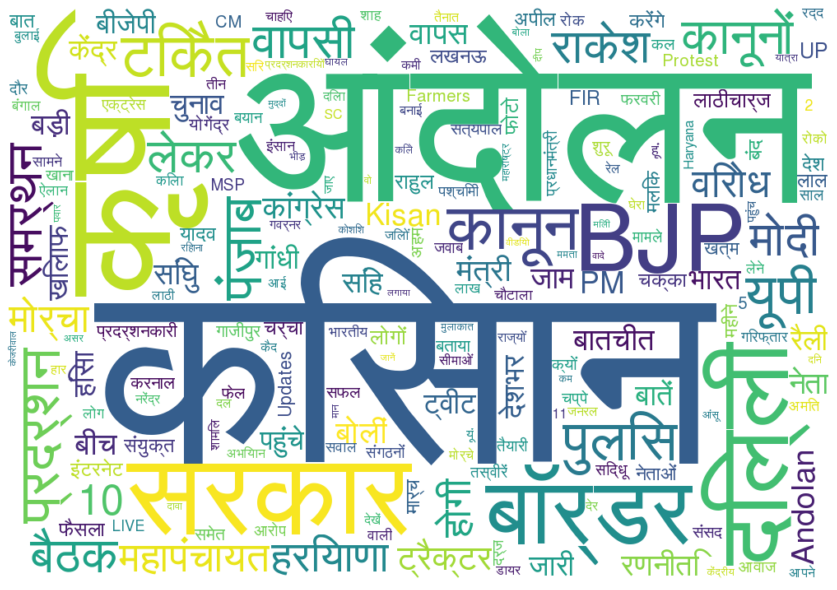

In [46]:
df_list = []
for i in range(len(df)):
    df_list +=df['news_title'][i]

font = "gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()